In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [3]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [39]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        self.fc1 = nn.Linear(1*28*28,500)
        self.fc2 = nn.Linear(500,150)
        self.fc3 = nn.Linear(150,10)
        
    def forward(self,x):
        x = x.view(-1,28*28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.softmax(self.fc3(x),dim=0)
        return x

In [40]:
#Hyperparameters
lr = 75e-3
n_epochs = 10
batch_size = 32
beta = 0.9

In [41]:
cifar_net = Net()
cifar_net = cifar_net.to(device)

In [45]:
#Load CIFAR10 Dataset
root = './data'
transform = transforms.Compose(
                        [transforms.ToTensor(),
                         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.MNIST(root, train=True, transform=transform, download=True)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root, train=False, transform=transform, download=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

#classes = ('plane', 'car', 'bird', 'cat',
#          'deer', 'dog', 'frog', 'horse', 'ship', 'truck') #CIFAR10

classes = (0,1,2,3,4,5,6,7,8,9) #MNIST

In [46]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(cifar_net.parameters(),lr=lr,momentum=beta)

In [50]:
for epoch in range(n_epochs):  
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device) 

        optimizer.zero_grad()

        outputs = cifar_net(inputs)
        #print(outputs.size())
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print('epoch:%d / %d | loss: %.3f' %
                  (epoch + 1, n_epochs, running_loss / 60000))
print('Finished Training')

epoch:1 / 10 | loss: 0.064
epoch:2 / 10 | loss: 0.064
epoch:3 / 10 | loss: 0.064
epoch:4 / 10 | loss: 0.064
epoch:5 / 10 | loss: 0.064
epoch:6 / 10 | loss: 0.064
epoch:7 / 10 | loss: 0.064
epoch:8 / 10 | loss: 0.064
epoch:9 / 10 | loss: 0.064
epoch:10 / 10 | loss: 0.064
Finished Training


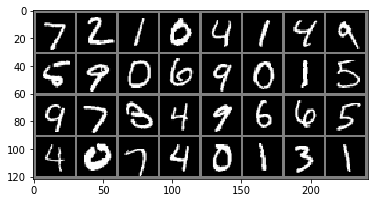

GroundTruth:      7     2     1     0     4     1     4     9     5     9     0     6     9     0     1     5     9     7     3     4     9     6     6     5     4     0     7     4     0     1     3     1
Predicted:      7     2     1     0     4     1     4     9     6     9     0     8     9     0     1     5     9     7     8     4     9     6     6     5     4     0     7     4     0     1     3     1


In [51]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(batch_size)))

outputs = cifar_net(images)
_, predicted = torch.max(outputs, 1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(batch_size)))


In [52]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
correct = 0
total = 0
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        n = (labels.size()[0])
        outputs = cifar_net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for i in range(n):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print('Accuracy of the network on the 60000 train images: %d %%' % (
    100 * correct / total))

with torch.no_grad():
    for data in testloader:
        images, labels = data
        n = (labels.size()[0])
        outputs = cifar_net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        for i in range(n):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of the network on the 60000 train images: 95 %
Accuracy of the network on the 10000 test images: 95 %
Accuracy of     0 : 97 %
Accuracy of     1 : 97 %
Accuracy of     2 : 96 %
Accuracy of     3 : 90 %
Accuracy of     4 : 95 %
Accuracy of     5 : 94 %
Accuracy of     6 : 97 %
Accuracy of     7 : 92 %
Accuracy of     8 : 95 %
Accuracy of     9 : 94 %
